### [Linear Regression with Tensorflow 2](https://towardsdatascience.com/linear-regression-from-scratch-with-tensorflow-2-part-1-3e2443804df0)

In [222]:
# Import LIBs
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__

'2.3.0'

In [223]:
# Decalre inputs & labels
xy = np.loadtxt('https://raw.githubusercontent.com/oberak/ai/main/csv/data-01-test-score.csv', delimiter=',', dtype=np.float32)

x_train = xy[:, :-1]
y_train = xy[:, [-1]]

In [224]:
# Declare W & b and set inital random values
W = tf.Variable(tf.random.normal([3, 1])) # weight
b = tf.Variable(tf.random.normal([1])) # bias

# for plot
global cost
cost = np.array([]) # costs, weight, bias

In [225]:
# Hypothesis: Linear regression H(X) = XW + b
def H(X):
  return tf.matmul(X, W) + b

In [226]:
# Cost(loss) function: Mean Square Error  Sum( ( H(x) - y )^2 ) / m
def mse(predicted, real):
  return tf.reduce_mean(tf.square(predicted - real))

In [227]:
# Optimizer: Gradient descent W = W - a(dy / dW), b = b - a(dy / db)
def gd(x, y, learning_rate):
  # get gradient
  with tf.GradientTape(persistent=True) as g:
    loss = mse(H(x), y)

  dy_dw = g.gradient(loss, W)
  dy_db = g.gradient(loss, b)
 
  W.assign_sub(learning_rate * dy_dw)
  b.assign_sub(learning_rate * dy_db)

  # for plot
  global cost
  cost = np.append(cost, loss.numpy())

In [228]:
# training function
def train(x, y, learning_rate=0.01, epoch=200):
  for i in range(epoch):
    gd(x, y, learning_rate)

In [229]:
# Use tf.data API to shuffle and batch data.
batch_size = 50
train_data=tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data=train_data.repeat().shuffle(1000).batch(batch_size).prefetch(1)

In [230]:
# run with batch
training_steps = 30+1
display_step=5
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  train(batch_x, batch_y, 0.000001, 1000)
  if step % display_step == 0:
    print('Step:{}, Cost:{}, Model H(x) = {}x + {}'.format(step, mse(H(batch_x), batch_y).numpy(), W.numpy()[0], b.numpy()[0])) # W=2, b=0

Step:5, Cost:7.7347822189331055, Model H(x) = [0.6978377]x + -2.131707191467285
Step:10, Cost:6.119559288024902, Model H(x) = [0.670928]x + -2.1343142986297607
Step:15, Cost:8.353261947631836, Model H(x) = [0.6488356]x + -2.1364941596984863
Step:20, Cost:5.960440158843994, Model H(x) = [0.6339707]x + -2.1384518146514893
Step:25, Cost:5.0396552085876465, Model H(x) = [0.6200704]x + -2.1405751705169678
Step:30, Cost:4.290099143981934, Model H(x) = [0.6063]x + -2.142035722732544


cost: 5.4706268310546875


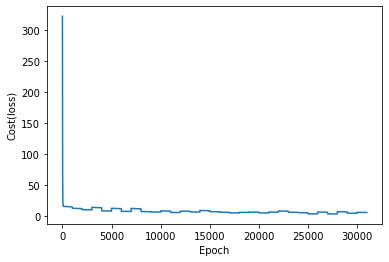

In [231]:
# cost logs
print('cost:', cost[len(cost)-1])
plt.plot(range(len(cost)), cost)
plt.xlabel('Epoch')
plt.ylabel('Cost(loss)')
plt.show()